In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm
import glob

In [2]:
data_home = os.path.join(home, "Data/CleanData/")


In [3]:
datapath = os.path.join(data_home, "*.txt")
list_file = glob.glob(datapath)
list_file

['/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/daddi08.txt',
 '/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/bouche07.txt',
 '/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/genzel2010.txt',
 '/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/kennicutt98a.txt',
 '/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/tacconi13.txt',
 '/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/kennicutt98b.txt',
 '/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/krumholz12.txt',
 '/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/daddi10.txt']

In [4]:
log_siggas = []
log_sigSFR = []
log_siggas_tdyn = []
galtype = []
for file in list_file:
    infile = open(file)
    lines = infile.readlines()
    print(file)
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            gal_type = str(line.split()[3])
            if(file == '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt'):
                siggas = np.log10(siggas)
                sigSFR = np.log10(sigSFR)
                sgastdyn = np.log10(sgastdyn)
            log_siggas.append(siggas)
            log_sigSFR.append(sigSFR)
            log_siggas_tdyn.append(sgastdyn)
            galtype.append(gal_type)
            break

/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/daddi08.txt
/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/bouche07.txt
/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/genzel2010.txt
/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/kennicutt98a.txt
/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/tacconi13.txt
/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/kennicutt98b.txt
/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/krumholz12.txt


ValueError: could not convert string to float: 'NGC'

In [5]:
log_siggas = np.asarray(log_siggas)
log_sigSFR = np.asarray(log_sigSFR)
log_siggas_tdyn = np.asarray(log_siggas_tdyn)
galtype = np.asarray(galtype)

In [6]:

tdyn = rmax/v0
sat_time = (Sigma0/G0)/Myr
xi_sol = np.log(G0*t0/Sigma0)
xi_sol, G0

(-3.3011022787786, 9.478378378378378e-18)

In [7]:
Gamma = np.logspace(-2, 2., 20)
xi_arr = np.linspace(-11, 7., 40) #xi = np.log(t0*G0/Sigma0)
sat_rate = 1./sat_time

a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        if(xcrit<0.0):
            xhigh = 1.*xcrit
            xlow  = 1.5*xcrit
        else:
            xhigh = 1.*xcrit
            xlow  = 0.5*xcrit
            
        G0 = Sigma0*np.exp(xi)/t0
        
        dMassFluxHI[i,j] = integrate.dblquad(dMassFlux_HI, 1, a, xlow, xhigh,   \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 2))[0]
        
        dMassFluxtot[i,j] = integrate.dblquad(dMassFlux_tot, 1, a, xlow, xhigh,  \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 2))[0] 
        
        j+=1
            
    i+=1


TypeError: dMassFlux_HI() takes 6 positional arguments but 8 were given

In [8]:
    
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_fSA = 1. - dMassFlux
np.amax(FH2_fSA),np.amin(FH2_fSA)

(0.9999998905132522, 0.0)

# Get Gamma and Xi from data parameters

In [9]:
fg = 0.1
sigSFR = 10.**(log_sigSFR)*Msun/yr_to_sec/kpc/kpc
p_avg = 3.e3 * 1.e5
G = 6.67e-8
siggas = 10.**(log_siggas)*Msun/pc/pc
siggas_tdyn = 10.**(log_siggas_tdyn)*Msun/yr_to_sec/pc/pc/1.e6
gamma_data = 2. * fg * sigSFR * p_avg/(math.pi * G * (siggas**2.))
G0 = 1. * 9.478378378378378e-18 
xi_data = np.log(G0/siggas_tdyn)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


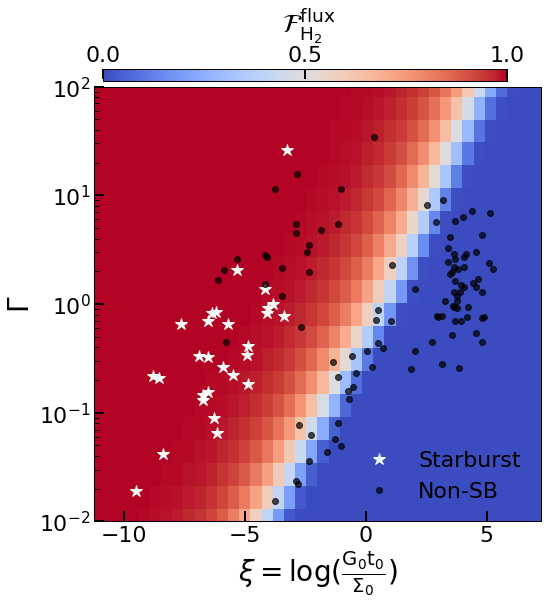

In [10]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1


plot = ax.pcolormesh(xi_arr, Gamma, np.transpose(FH2_fSA),\
                    vmin=0.0, vmax=1.,
                    cmap='coolwarm')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}^{\rm flux}$")

ax.set_ylabel(r'$\Gamma$', fontsize=28)
ax.set_xlabel(r'$\xi=\rm{log}(\frac{G_0 t_0}{\Sigma_0})$', fontsize=28)
ax.legend(loc='lower left', frameon=False, labelcolor='white')
ax.set_yscale('log')



yy =  10.**( xi_arr * 0.3 + 1.5) 
# ax.plot(xi_arr, yy, color='black')


ax.set_ylim(np.amin(Gamma),np.amax(Gamma))
for i in range(xi_data.shape[0]):
    if(galtype[i]=='Starburst'):
        if(i==3):
            ax.plot(xi_data[i], gamma_data[i], '*', color='mintcream', markersize='12', label='Starburst')
        else:
            ax.plot(xi_data[i], gamma_data[i], '*', color='mintcream', markersize='12')
    else:
        if(i==16):
            ax.plot(xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.7, label='Non-SB')
        else:
            ax.plot(xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.7)
        
ax.legend(frameon=False)
# save_fig = os.path.join(fig_path, 'gam_vs_zai-SB.jpeg')
# plt.savefig(save_fig, bbox_inches='tight', dpi=160)

# Mass Ratio

In [10]:
Gamma = np.logspace(-2, 2., 20)
xi_arr = np.linspace(-11, 7., 40) #xi = np.log(t0*G0/Sigma0)
sat_rate = 1./sat_time

a = rmax/r0

dMassHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMasstot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        if(xcrit<0.0):
            xhigh = 1.*xcrit
            xlow  = 1.5*xcrit
        else:
            xhigh = 1.*xcrit
            xlow  = 0.5*xcrit
            
        G0 = Sigma0*np.exp(xi)/t0
        
        dMassHI[i,j] = integrate.dblquad(dMass_HI, 1, a, xlow, xhigh,   \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 2))[0]
        
        dMasstot[i,j] = integrate.dblquad(dMass_tot, 1, a, xlow, xhigh,  \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 2))[0] 
        
        j+=1
            
    i+=1
    


/Users/aditivijayan/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [14]:
    
dMass = dMassHI/dMasstot
FH2_fSA_mass = 1. - dMass
np.amax(FH2_fSA_mass),np.amin(FH2_fSA_mass)

(0.9999972888759681, 0.0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


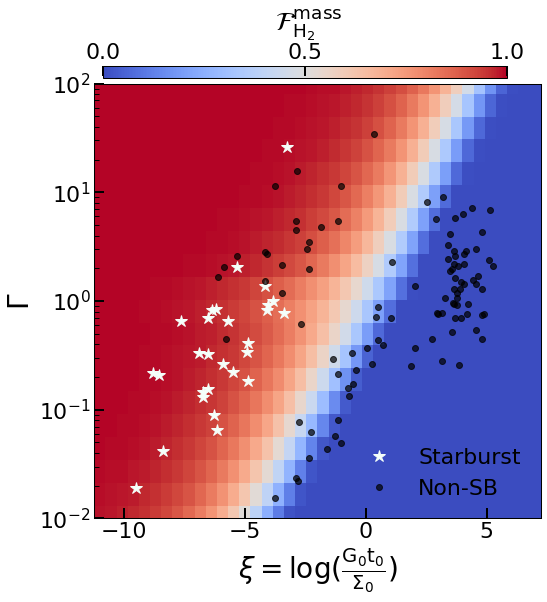

In [32]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1


plot = ax.pcolormesh(xi_arr, Gamma, np.transpose(FH2_fSA_mass),\
                    vmin=0.0, vmax=1.,
                    cmap='coolwarm')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}^{\rm mass}$")

ax.set_ylabel(r'$\Gamma$', fontsize=28)
ax.set_xlabel(r'$\xi=\rm{log}(\frac{G_0 t_0}{\Sigma_0})$', fontsize=28)
ax.legend(loc='lower left', frameon=False, labelcolor='white')
ax.set_yscale('log')



yy =  10.**( xi_arr * 0.3 + 1.5) 
# ax.plot(xi_arr, yy, color='black')


ax.set_ylim(np.amin(Gamma),np.amax(Gamma))
for i in range(xi_data.shape[0]):
    if(galtype[i]=='Starburst'):
        if(i==3):
            ax.plot(xi_data[i], gamma_data[i], '*', color='mintcream', markersize='12', label='Starburst')
        else:
            ax.plot(xi_data[i], gamma_data[i], '*', color='mintcream', markersize='12')
    else:
        if(i==16):
            ax.plot(xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.7, label='Non-SB')
        else:
            ax.plot(xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.7)
        
ax.legend(frameon=False)
save_fig = os.path.join(fig_path, 'gam_vs_zai-SB-mass.jpeg')
plt.savefig(save_fig, bbox_inches='tight', dpi=160)